In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("..\DB\Git_Data(range(1~50,000)).csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 2: invalid start byte

In [ ]:
df.head

<bound method NDFrame.head of         Num  User_ID   User_Name            Repository_Name  \
0         1        1     mojombo  30daysoflaptops.github.io   
1         2        1     mojombo                  asteroids   
2         3        1     mojombo       benbalter.github.com   
3         4        1     mojombo                       bert   
4         5        1     mojombo                   bert.erl   
...     ...      ...         ...                        ...   
8436  10308      999  maxthelion                nextjs-blog   
8437  10309      999  maxthelion                page_cycler   
8438  10310      999  maxthelion           platform-website   
8439  10312      999  maxthelion                 Pusher-PHP   
8440  10313      999  maxthelion               qmk_firmware   

                created_at            updated_at             pushed_at  CSS  \
0     2014-11-20T06:42:06Z  2021-04-03T10:15:42Z  2014-11-20T06:42:47Z    1   
1     2014-03-03T07:40:00Z  2022-03-31T18:12:41Z  2015-

In [ ]:
df['date'] = df['created_at']
df['year'] = df['created_at']
df['date'] = df.created_at.str[0:10] # 날짜 부분 추출
df['year'] = df.created_at.str[0:4]

df['date'] = pd.to_datetime(df.date)
dt = df.sort_values(by='date')

df.year


0       2014
1       2014
2       2015
3       2009
4       2009
        ... 
8436    2021
8437    2011
8438    2017
8439    2010
8440    2021
Name: year, Length: 8441, dtype: object

In [ ]:
dt = dt.drop(['created_at'], axis=1)
dt = dt.drop(['updated_at'], axis=1)
dt = dt.drop(['pushed_at'], axis=1)


dt.head

<bound method NDFrame.head of        Num  User_ID     User_Name   Repository_Name  CSS  JavaScript  \
1181  1446      154    nicksieger     attachment_fu    0           0   
7745  9496      907     lukaszcho     attachment_fu    0           0   
146    181       21  technoweenie     attachment_fu    0           0   
2137  2588      247      francois     attachment_fu    0           0   
158    197       21  technoweenie         duplikate    0           0   
...    ...      ...           ...               ...  ...         ...   
5648  6918      656      tomislav       awesome-mac    0           1   
1942  2356      234       ryenski    accept-bitcoin    0           0   
710    886      103     freeformz              Boop    0           1   
3031  3697      352      gthoppae      autocomplete    0           1   
1552  1895      188          nex3  cohost-backloggd    0           0   

      CoffeeScript  Shell  Ruby  Perl  ...  Markdown  SQF  Lean  Cuda  CUE  \
1181             0      0  

In [ ]:
value = dt.sum()
value = value.drop("User_Name")
value = value.drop("Repository_Name")
value = value.drop("year")
sort_val = value.sort_values(ascending = False)
sort_val = sort_val.drop("Num")
sort_val = sort_val.drop("User_ID")

List_Lang = sort_val.index
List_Lang = List_Lang.to_list()

C:\Users\admin\AppData\Local\Temp\ipykernel_8012\357141954.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  value = dt.sum()


In [ ]:
def list_Chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

list_Chunked = list_Chunk(List_Lang, 10)

In [ ]:
list_Chunked
List_top10 = list_Chunked[0]
List_top10

dt[List_top10]

,Ruby,JavaScript,Shell,HTML,CSS,Python,Makefile,Go,CoffeeScript,Dockerfile
1181,1,0,0,0,0,0,0,0,0,0
7745,1,0,0,0,0,0,0,0,0,0
146,1,0,0,0,0,0,0,0,0,0
2137,1,0,0,0,0,0,0,0,0,0
158,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5648,0,1,0,0,0,0,0,0,0,1
1942,0,0,0,0,0,0,0,0,0,0
710,0,1,0,0,0,0,0,0,0,0
3031,0,1,1,0,0,0,0,0,0,0


In [ ]:
grouped = dt[List_top10].groupby(dt['year']).sum()
grouped

,Ruby,JavaScript,Shell,HTML,CSS,Python,Makefile,Go,CoffeeScript,Dockerfile
year,,,,,,,,,,
2008,547,152,44,19,18,29,1,0,1,0
2009,567,174,48,22,19,39,2,1,0,1
2010,458,166,50,20,15,41,6,1,11,1
2011,427,174,65,20,19,26,2,4,35,1
2012,386,183,93,23,28,32,6,12,61,3
2013,375,215,128,28,94,50,3,27,46,1
2014,228,161,97,41,140,40,10,29,48,2
2015,292,230,166,225,192,58,67,64,43,3
2016,196,186,155,212,146,61,40,40,22,7


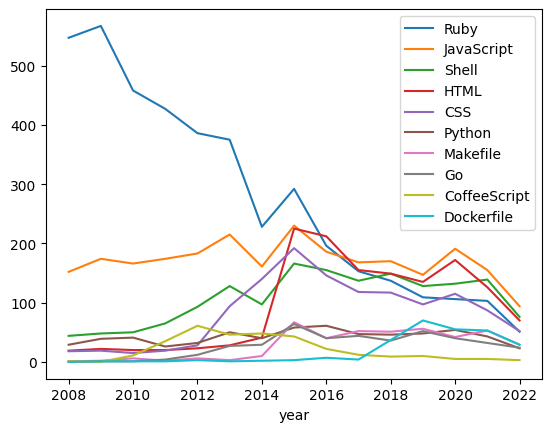

In [ ]:
ax = grouped.plot(kind='line')